# Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_overview import DfOverview
from df_cleaner import DfCleaner
from df_selector import DfSelector
from vis_seaborn import *
from vis_plotly import *

2021-07-16 03:16:24,117 — DfOverview — DEBUG — Loaded successfully!
2021-07-16 03:16:24,123 — DfCleaner — DEBUG — Loaded successfully!
2021-07-16 03:16:24,126 — DfSelector — DEBUG — Loaded successfully!


## Data reading

In [4]:
df = pd.read_csv("../data/clean_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146882 entries, 0 to 146881
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146882 non-null  int64  
 1   start                           146882 non-null  object 
 2   start_ms                        146882 non-null  float64
 3   end                             146882 non-null  object 
 4   end_ms                          146882 non-null  float64
 5   dur_(ms)                        146882 non-null  float64
 6   imsi                            146882 non-null  int64  
 7   msisdn_number                   146882 non-null  int64  
 8   imei                            146882 non-null  int64  
 9   last_location_name              146882 non-null  object 
 10  avg_rtt_dl_(ms)                 146882 non-null  float64
 11  avg_rtt_ul_(ms)                 146882 non-null  float64
 12  avg_bearer_tp_dl

## Describe all  relevant variables and associated data types (slide). 

The columns we would be doing this Univariate Analysis are given in task 1.1 They are
- number of xDR sessions
- Session duration
- the total download(DL) and upload(UL) data
- the total data volume for Applications

I choose the following columns based on that

In [5]:
relavant_cols = ["msisdn_number",
                 "handset_manufacturer",
                 "bearer_id", 
                 "dur_(ms)",
                 'social_media',
                 'google',
                 'email',
                 'youtube',
                 'netflix',
                 'gaming',
                 'other',
                 'total_data']

In [6]:
df[relavant_cols].head()

,msisdn_number,handset_manufacturer,bearer_id,dur_(ms),social_media,google,email,youtube,netflix,gaming,other,total_data
0,33659219748,Samsung,-9223372036854775808,245071.0,1585413.0,8778341.0,766046.0,22911539.0,13185350.0,812946425.0,77671250.0,872988322.0
1,33665646348,Apple,7277825610512449536,245071.0,2697600.0,6532777.0,3780918.0,21981135.0,26779600.0,574923841.0,110548061.0,651527183.0
2,33664473872,Huawei,-9223372036854775808,245071.0,839351.0,8822396.0,2348652.0,19623308.0,20124838.0,505668618.0,538369717.0,568809782.0
3,33603291937,Samsung,-9223372036854775808,245071.0,1715492.0,13395961.0,3424203.0,26178247.0,22810379.0,769947925.0,45876928.0,848798988.0
4,33659219748,Samsung,-9223372036854775808,245071.0,2480347.0,7991932.0,3672362.0,25308492.0,26233613.0,255096405.0,50438697.0,331143097.0


## Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.


In [7]:
df[relavant_cols].describe()

,msisdn_number,bearer_id,dur_(ms),social_media,google,email,youtube,netflix,gaming,other,total_data
count,1.468820e+05,1.468820e+05,146882.000000,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05
mean,3.596869e+10,-8.628466e+17,100178.017906,1.827749e+06,7.807995e+06,2.259053e+06,2.264163e+07,2.262943e+07,4.303485e+08,4.292612e+08,4.957771e+08
std,8.792295e+11,8.256065e+18,58974.027810,1.035576e+06,3.517123e+06,1.071134e+06,9.244443e+06,9.259341e+06,2.440874e+08,2.432103e+08,2.444379e+08
min,3.360100e+10,-9.223372e+18,7142.000000,1.563000e+03,4.033000e+04,8.359000e+03,1.296550e+05,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,3.365128e+10,-9.223372e+18,58526.000000,9.313442e+05,4.943722e+06,1.358982e+06,1.599688e+07,1.598191e+07,2.186899e+08,2.184676e+08,2.844771e+08
50%,3.366369e+10,6.917538e+18,86399.000000,1.825410e+06,7.815465e+06,2.263822e+06,2.266287e+07,2.263517e+07,4.316601e+08,4.297967e+08,4.969303e+08
75%,3.368344e+10,7.349883e+18,133144.000000,2.727156e+06,1.068315e+07,3.159540e+06,2.929221e+07,2.928816e+07,6.415632e+08,6.396632e+08,7.066147e+08
max,3.370000e+14,7.566056e+18,245071.000000,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,9.536320e+08


## Non-Graphical Univariate Analysis

In [8]:
cols = ['social_media',
        'google',
        'email',
        'youtube',
        'netflix',
        'gaming',
        'other',
        'total_data']

In [9]:
df[cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
social_media,146882.0,1.827749e+06,1.035576e+06,1563.0,9.313442e+05,1825410.0,2.727156e+06,3650861.0
google,146882.0,7.807995e+06,3.517123e+06,40330.0,4.943722e+06,7815465.0,1.068315e+07,15528782.0
email,146882.0,2.259053e+06,1.071134e+06,8359.0,1.358982e+06,2263821.5,3.159540e+06,4518036.0
youtube,146882.0,2.264163e+07,9.244443e+06,129655.0,1.599688e+07,22662867.5,2.929221e+07,45190078.0
netflix,146882.0,2.262943e+07,9.259341e+06,98432.0,1.598191e+07,22635170.0,2.928816e+07,45198153.0
gaming,146882.0,4.303485e+08,2.440874e+08,306358.0,2.186899e+08,431660065.0,6.415632e+08,859202784.0
other,146882.0,4.292612e+08,2.432103e+08,149045.0,2.184676e+08,429796668.5,6.396632e+08,859520934.0
total_data,146882.0,4.957771e+08,2.444379e+08,28956107.0,2.844771e+08,496930298.0,7.066147e+08,953632035.0


In [10]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[cols])

In [11]:
scaled_data = pd.DataFrame(scaled_array, columns=cols)
scaled_data.head()

,social_media,google,email,youtube,netflix,gaming,other,total_data
0,-0.234012,0.275893,-1.393861,0.029197,-1.019955,1.567468,-1.445626,1.543183
1,0.839971,-0.362575,1.420803,-0.071448,0.448216,0.592312,-1.310447,0.637179
2,-0.954446,0.288419,0.083649,-0.326502,-0.270495,0.308580,0.448620,0.298779
3,-0.108401,1.588794,1.087777,0.382569,0.019542,1.391308,-1.576354,1.444224
4,0.630181,0.052298,1.319456,0.288484,0.389249,-0.717992,-1.557597,-0.673523


In [12]:
scaled_data.describe()

,social_media,google,email,youtube,netflix,gaming,other,total_data
count,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05,1.468820e+05
mean,8.030262e-17,3.599105e-17,-2.108186e-16,6.724135e-17,4.527907e-17,9.244476e-17,7.730337e-17,7.401386e-18
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.763455e+00,-2.208536e+00,-2.101233e+00,-2.435198e+00,-2.433335e+00,-1.761843e+00,-1.764372e+00,-1.909780e+00
25%,-8.656124e-01,-8.143825e-01,-8.402995e-01,-7.187847e-01,-7.179287e-01,-8.671456e-01,-8.667159e-01,-8.644350e-01
50%,-2.258665e-03,2.123889e-03,4.452111e-03,2.297725e-03,6.195494e-04,5.373446e-03,2.201772e-03,4.717850e-03
75%,8.685118e-01,8.174775e-01,8.406885e-01,7.194165e-01,7.191389e-01,8.653272e-01,8.651061e-01,8.625435e-01
max,1.760486e+00,2.195207e+00,2.108972e+00,2.439144e+00,2.437409e+00,1.756976e+00,1.769091e+00,1.873099e+00


## Graphical Univariate Analysis

In [13]:
sample = scaled_data.sample(5000)
sample = np.array(sample[cols]).reshape(8, -1)
sample.shape


(8, 5000)

In [14]:
# histogram(sample, cols, .1)

In [15]:
sample[0] = sample[0]-8
sample[1] = sample[0]-6
sample[2] = sample[0]-4
sample[3] = sample[0]-2
sample[4] = sample[0]-0
sample[5] = sample[0]-2
sample[6] = sample[0]-4
sample[7] = sample[0]-6


In [16]:
# histogram(sample, cols, .1)

## Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [17]:
# sample = scaled_data.sample(1000)
# scatter(sample, x="google", y="total_data", fit='ols', mx='box', my='violin')

In [18]:
# scatter(sample, x="gaming", y="total_data",
#         fit='ols', mx='box', my='violin')

In [19]:
# scatter(sample, x="netflix", y="total_data", fit='ols', mx='box', my='violin')

In [20]:
# scatter(sample, x="other", y="total_data", fit='ols', mx='box', my='violin')

In [21]:
# def corelation(df):
#     fig = px.scatter_matrix(sample, dimensions=[
#         "total_data",
#         "netflix",
#         "youtube",
#         "gaming",
#         "other",
#         "google"
#     ])
#     fig.update_layout(width=1200, height=600)
#     fig.show()


# corelation(sample)


## Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [22]:
user_dur = df.groupby(
    'msisdn_number').agg({'dur_(ms)': 'sum', 'total_data': 'sum'})
user_dur

,dur_(ms),total_data
msisdn_number,,
33601001722,116720.0,8.786906e+08
33601001754,181230.0,1.568596e+08
33601002511,134969.0,5.959665e+08
33601007832,49878.0,4.223207e+08
33601008617,37104.0,1.457411e+09
...,...,...
33789967113,160461.0,2.081231e+08
33789980299,210389.0,1.094693e+09
33789996170,8810.0,7.146416e+08


In [23]:
user_dur['dur_decile'] = pd.qcut(user_dur['dur_(ms)'], 5, labels=np.arange(1, 6))
total_data_per_decile = user_dur.groupby('dur_decile').agg(
    {'dur_(ms)': 'sum', 'total_data': 'sum'})
total_data_per_decile

,dur_(ms),total_data
dur_decile,,
1,6.474188e+08,1.142998e+13
2,1.778446e+09,1.227155e+13
3,2.129877e+09,1.156524e+13
4,3.414379e+09,1.377362e+13
5,6.744227e+09,2.378034e+13


In [24]:
fig = px.line(total_data_per_decile, x=[1, 2, 3, 4, 5], y=[
              "dur_(ms)", "total_data"], title='Top 5 deciled customers by duration', 
              labels={'value': "dur_(ms) and total_data", 'x': "5 Decile Duration"})
fig.show()

## Correlation Analysis 

In [26]:
data_usage_df = df[['social_media',
                   'google',
                    'email',
                    'youtube',
                    'netflix',
                    'gaming',
                    'other', ]].copy()
data_usage_corr = data_usage_df.corr(method='pearson')
data_usage_corr


,social_media,google,email,youtube,netflix,gaming,other
social_media,1.000000,-0.001914,0.004184,0.000593,0.001384,0.001904,0.005532
google,-0.001914,1.000000,-0.000048,0.002164,-0.001990,-0.000825,-0.001301
email,0.004184,-0.000048,1.000000,-0.003440,0.001524,0.000055,-0.000761
youtube,0.000593,0.002164,-0.003440,1.000000,0.003619,-0.003728,0.003225
netflix,0.001384,-0.001990,0.001524,0.003619,1.000000,-0.003505,-0.007931
gaming,0.001904,-0.000825,0.000055,-0.003728,-0.003505,1.000000,-0.002828
other,0.005532,-0.001301,-0.000761,0.003225,-0.007931,-0.002828,1.000000


In [27]:
fig = px.imshow(data_usage_corr.values)
fig.show()

## Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

In our dataset the original feature space has 30 dimensions, known as p dimensions. PCA will project the data onto a smaller subspace of k dimensions (where k < p) while retaining as much of the variation as possible. These k dimensions are known as the principal components. 

By applying PCA, we lose some of the variance (i.e., information). By reducing the dimensionality of the data, PCA will reduce the size of the data.
- This will improve the performance of machine learning algorithms.
- This will reduce hardware requirements and speed up the training process.
- This will allow us to easily understand the underlying structure of the data.
- This will allow us to visualize the data on a 2d or 3d plot (if we choose the number of principal components as 2 or 3).

We follow the following steps:
1. Obtain the feature matrix

In [29]:
numeric_columns = [ 'start_ms',
                    'end_ms',
                    'dur_(ms)',
                    'avg_rtt_dl_(ms)',
                    'avg_rtt_ul_(ms)',
                    'avg_bearer_tp_dl_(kbps)',
                    'avg_bearer_tp_ul_(kbps)',
                    'tcp_dl_retrans_vol_(bytes)',
                    'tcp_ul_retrans_vol_(bytes)',
                    'dl_tp_<_50_kbps_(%)',
                    '50_kbps_<_dl_tp_<_250_kbps_(%)',
                    '250_kbps_<_dl_tp_<_1_mbps_(%)',
                    'dl_tp_>_1_mbps_(%)',
                    'ul_tp_<_10_kbps_(%)',
                    '10_kbps_<_ul_tp_<_50_kbps_(%)',
                    '50_kbps_<_ul_tp_<_300_kbps_(%)',
                    'ul_tp_>_300_kbps_(%)',
                    'activity_duration_dl_(ms)',
                    'activity_duration_ul_(ms)',
                    'nb_of_sec_with_vol_dl_<_6250b',
                    'nb_of_sec_with_vol_ul_<_1250b',
                    'social_media_dl_(bytes)',
                    'social_media_ul_(bytes)',
                    'google_dl_(bytes)',
                    'google_ul_(bytes)',
                    'email_dl_(bytes)',
                    'email_ul_(bytes)',
                    'youtube_dl_(bytes)',
                    'youtube_ul_(bytes)',
                    'netflix_dl_(bytes)',
                    'netflix_ul_(bytes)',
                    'gaming_dl_(bytes)',
                    'gaming_ul_(bytes)',
                    'other_dl_(bytes)',
                    'other_ul_(bytes)',
                    'total_ul_(bytes)',
                    'total_dl_(bytes)']

In [31]:
feature_matrix = df[numeric_columns].values
feature_matrix.shape

(146882, 37)

2. Standardize the features if necessary

In [32]:
scaler = StandardScaler()
scaler.fit(feature_matrix)

feature_matrix_scaled = scaler.transform(feature_matrix)

3. Choose the right number of dimensions(k)


In [57]:
pca_37 = PCA(n_components=37, random_state=1)
pca_37.fit(feature_matrix_scaled)
x_pca_37 = pca_37.transform(feature_matrix_scaled)

In [58]:
print(
    f"percentage of variance kept: {sum(pca_37.explained_variance_ratio_ * 100):.2}" )


percentage of variance kept:  100.00000000000001


In [67]:
feat_mt_ratio = pca_37.explained_variance_ratio_ * 100
for i in range(len(numeric_columns)):
  print(
      f'column {numeric_columns[i]:32}, contribution to variability = {feat_mt_ratio[i]:.2f}')


column start_ms                        , contribution to variability = 27.29
column end_ms                          , contribution to variability = 6.07
column dur_(ms)                        , contribution to variability = 6.04
column avg_rtt_dl_(ms)                 , contribution to variability = 4.20
column avg_rtt_ul_(ms)                 , contribution to variability = 3.40
column avg_bearer_tp_dl_(kbps)         , contribution to variability = 3.10
column avg_bearer_tp_ul_(kbps)         , contribution to variability = 3.07
column tcp_dl_retrans_vol_(bytes)      , contribution to variability = 3.07
column tcp_ul_retrans_vol_(bytes)      , contribution to variability = 3.05
column dl_tp_<_50_kbps_(%)             , contribution to variability = 3.05
column 50_kbps_<_dl_tp_<_250_kbps_(%)  , contribution to variability = 3.04
column 250_kbps_<_dl_tp_<_1_mbps_(%)   , contribution to variability = 3.03
column dl_tp_>_1_mbps_(%)              , contribution to variability = 3.03
column ul_t

The first component alone captures about 44.27 % of the variability in the dataset and the second component alone captures about 18.97 % of the variability in the dataset and so on


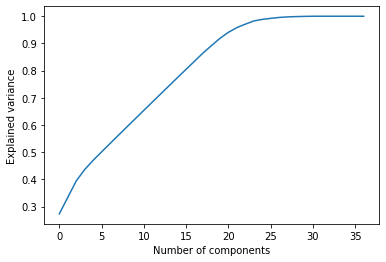

In [61]:
plt.plot(np.cumsum(pca_37.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance");

You can see that the first 10 principal components keep about 95.1 % of the variability in the dataset while reducing 20 (30–10) features in the dataset.


In [62]:
pca_21 = PCA(n_components=21, random_state=1)
pca_21.fit(feature_matrix_scaled)
x_pca_21 = pca_21.transform(feature_matrix_scaled)

In [64]:
print("percentage of variance kept: ", sum(
    pca_21.explained_variance_ratio_ * 100))


percentage of variance kept:  94.08426687586679


In [65]:
feat_mt_ratio = pca_21.explained_variance_ratio_ * 100

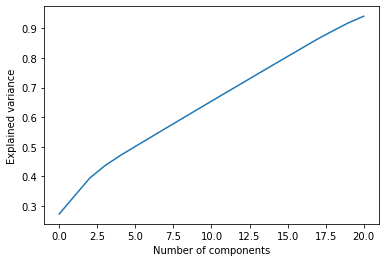

In [66]:
plt.plot(np.cumsum(pca_21.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance");